# **Assignment-IV**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#  **1. Load Data**

In [5]:
df =pd.read_excel('E:/DFM/data/Online Retail.xlsx')
df.shape

(541909, 8)



```
# This is formatted as code
```

#  **2. Data Preparation**


### Remove the observations with Negative quantity values

In [7]:
df = df=df.loc[df['Quantity']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Add a column for "Sales"

In [9]:

df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **3.Data Analysis**

### What's the total revenue per country? (Arrange the maximum value first)

In [11]:

total_revenue_per_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
total_revenue_per_country


Country
United Kingdom          9003097.964
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

### Picturize the countrywise Total sales in Barplot

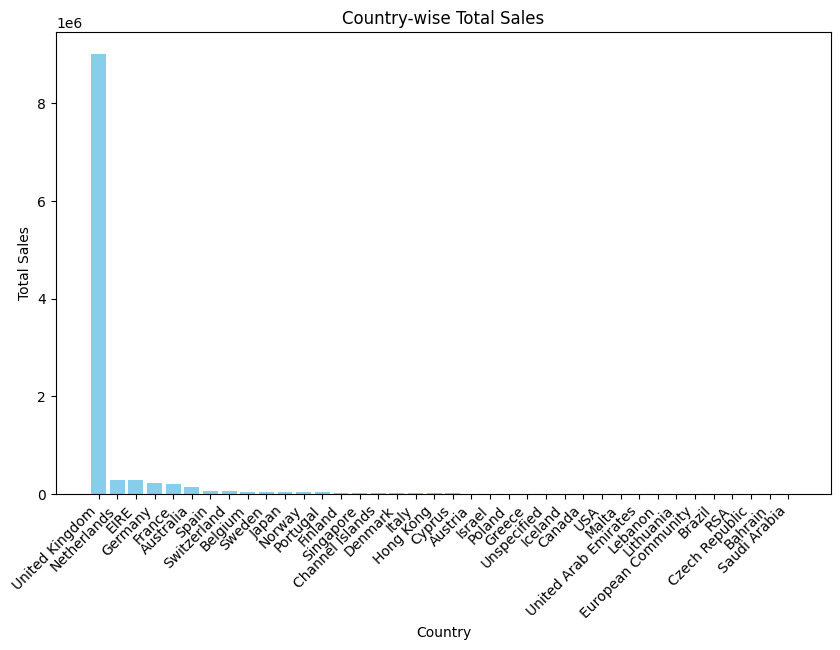

In [13]:
grouped_df =df.groupby('Country', as_index=False)['Sales'].sum()

grouped_df = grouped_df.sort_values(by='Sales', ascending=False)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Country'], grouped_df['Sales'], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Country-wise Total Sales')
plt.show()

### Retreive United Kingdom customers only and named the resultant data frame as df_uk for further Analysis

In [14]:
df_uk =df[df['Country'] == 'United Kingdom']
#check the shape
df_uk.shape

(486286, 9)

### What are the products that are most bought in UK?

In [18]:
groupedProduct = df_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)



,StockCode,Quantity
2394,23843,80995
1948,23166,77036
1036,22197,53343
2568,84077,49526
3541,85099B,44268
3552,85123A,39513
2673,84879,33735
1419,22616,25331
366,21212,24986
1017,22178,23692


### Calculate the number of orders per customer?

In [25]:
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


### Find Popular Items in the month of September 2011

In [21]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

C:\Users\SRL123\AppData\Local\Temp\ipykernel_12636\3164953202.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


Quantity
InvoiceDate StockCode             
2010-12-31  10002              251
            10120               16
            10125              154
            10133              130
            10135              411
...                            ...
2011-12-31  DCGSSBOY             1
            DOT                 17
            M                  819
            POST               124
            gift_0001_10         1

[34177 rows x 1 columns]

In [23]:
September_month_sorted_df =date_item_df.loc['2011-09-01':'2011-09-30']

September_month_sorted_df

Quantity
InvoiceDate StockCode             
2011-09-30  10080               60
            10120               10
            10125              210
            10133              207
            10135               70
...                            ...
            DOT                 47
            M                  523
            PADS                 2
            POST              1031
            gift_0001_30         1

[2741 rows x 1 columns]